# Data Science Challenge
## Conversion Rate

The goal of this challenge is to build a model that predicts conversion rate and, based on the
model, come up with ideas to improve conversion.

We have data about users who hit our site: whether they converted or not as well as some of
their characteristics such as their country, the marketing channel, their age, whether they are
repeat users and the number of pages visited during that session (as a proxy for site
activity/time spent on site).
Your tasks are :
1. Predict conversion rate
2. Come up with recommendations for the product team and the marketing team to improve conversion rate

Data Description:
The table has information about signed-in users during one session. Each row is a user session.

Columns: 
1. country : user country based on the IP address
2. age : user age. Self-reported at sign-in step
3. new_user : whether the user created the account during this session or had already an account and simply came back to the site
4. source : marketing channel source
5. Ads: came to the site by clicking on an advertisement
6. Seo: came to the site by clicking on search results
7. Direct: came to the site by directly typing the URL on the browser
8. total_pages_visited: number of total pages visited during the session. This is a proxy for time spent on site and engagement during the session.
9. converted: this is our label. 1 means they converted within the session, 0 means they left
without buying anything. 
The goal is to increase conversion rate: # conversions / total sessions.

Read in data from Vertica. Install vertica_python package if you don't have it.

In [1]:
#!pip install vertica_python
#!pip install ggplot

In [2]:
import vertica_python
import pandas as pd

In [3]:
conn_info = {'host': 'sbg-vertica01-prd.intuit.net',
             'port': 5433,
             'user': 'xbao',
             'password': 'xxxxx',
             'database': 'IDEA',
             # 10 minutes timeout on queries
             'read_timeout': 600,
             # default throw error on invalid UTF-8 results
             'unicode_error': 'strict',
             # SSL is disabled by default
             'ssl': False,
             'connection_timeout': 5}

# simple connection, with manual close
connection = vertica_python.connect(**conn_info)

In [4]:
sql_query="select * from sbg_sandbox.conversion_data"
data=pd.read_sql(sql_query,connection)

In [5]:
data.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,China,17,0,Ads,6,0
1,China,17,0,Ads,6,0
2,China,17,0,Ads,6,0
3,China,17,0,Ads,6,0
4,China,17,0,Ads,6,0
5,China,17,0,Ads,6,0
6,China,17,0,Ads,6,0
7,China,17,0,Ads,6,0
8,China,17,0,Ads,6,0
9,China,17,0,Ads,6,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,316200.0,30.569858,8.271802,17.0,24.0,30.0,36.0,123.0
new_user,316200.0,0.685465,0.464331,0.0,0.0,1.0,1.0,1.0
total_pages_visited,316200.0,4.872966,3.341104,1.0,2.0,4.0,7.0,29.0
converted,316200.0,0.032258,0.176685,0.0,0.0,0.0,0.0,1.0


In [8]:
data[data.age>100]

,country,age,new_user,source,total_pages_visited,converted
71150,UK,111,0,Ads,10,1
107733,Germany,123,0,Seo,15,1


In [9]:
print(data.new_user.value_counts())

1    216744
0     99456
Name: new_user, dtype: int64


In [10]:
print(data.converted.value_counts())

0    306000
1     10200
Name: converted, dtype: int64


In [11]:
print(data.country.value_counts())

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64


In [12]:
print(data.source.value_counts())

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64


In [13]:
data=data[data.age<100]

In [14]:
data[data.age>100]

,country,age,new_user,source,total_pages_visited,converted


In [15]:
import matplotlib.pyplot as plt
import seaborn

In [16]:
%matplotlib inline

(array([  7.05710000e+04,   8.29340000e+04,   7.77550000e+04,
          5.12610000e+04,   2.38480000e+04,   8.28100000e+03,
          1.31300000e+03,   2.16000000e+02,   1.60000000e+01,
          3.00000000e+00]),
 array([ 17. ,  23.2,  29.4,  35.6,  41.8,  48. ,  54.2,  60.4,  66.6,
         72.8,  79. ]),
 <a list of 10 Patch objects>)

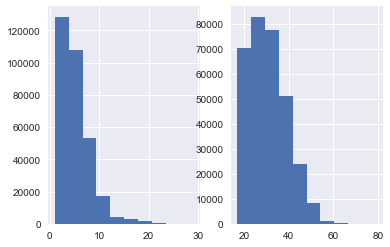

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.hist(data.total_pages_visited)
ax2 = fig.add_subplot(122)
ax2.hist(data.age)

In [18]:
data.groupby(['country'])['converted'].mean()

country
China      0.001332
Germany    0.062428
UK         0.052612
US         0.037801
Name: converted, dtype: float64

In [19]:
data.groupby(['source'])['converted'].mean()

source
Ads       0.034472
Direct    0.028169
Seo       0.032888
Name: converted, dtype: float64

In [20]:
data.groupby(['new_user'])['converted'].mean()

new_user
0    0.071983
1    0.014021
Name: converted, dtype: float64

In [21]:
newdata=pd.get_dummies(data)
newdata.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,17,0,6,0,1,0,0,0,1,0,0
1,17,0,6,0,1,0,0,0,1,0,0
2,17,0,6,0,1,0,0,0,1,0,0
3,17,0,6,0,1,0,0,0,1,0,0
4,17,0,6,0,1,0,0,0,1,0,0


Split the data into training and validation

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#features = newdata[['country_China','country_Germany','country_US','country_UK','age','source_Ads','source_Direct','source_Seo','new_user','total_pages_visited']].values

#target = newdata['converted'].values


X = newdata.drop('converted', axis=1)
y = newdata['converted']

In [24]:
features_train, features_test, target_train, target_test = train_test_split(
        X, y, test_size=0.20, random_state=20)

In [25]:
import numpy as np
print(target_train.shape)
print(target_test.shape)
print(features_train.shape)
print(features_test.shape)
np.mean(target_test)

(252958,)
(63240,)
(252958, 10)
(63240, 10)


0.031625553447185324

## Random Forest
import random forest function

In [26]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import KFold

Train the random forest classifier

In [27]:
# Create a random forest classifier. By convention, clf means 'classifier'
clf = RandomForestClassifier(n_estimators = 100, max_features = 'auto', n_jobs=-1, max_depth = 3, class_weight = 'balanced')

# Train the classifier to take the training features and learn how they relate
# to the training y (conversion)
clf.fit(features_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
preds = clf.predict(features_train)

In [29]:
# Create confusion matrix
pd.crosstab(target_train, preds, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,229974,14786
1,524,7674


In [30]:
# Accuracy i.e. 1-misclassification rate
clf.score(features_test, target_test)

0.93804554079696389

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\ProgramData\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


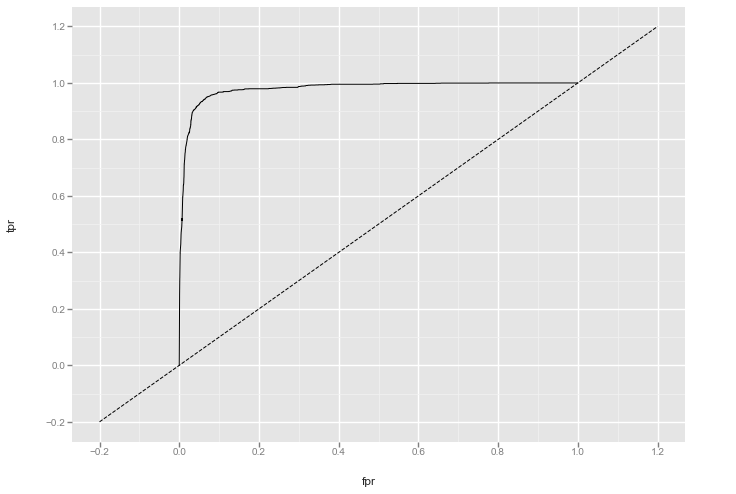

<ggplot: (-9223372036839626019)>

In [31]:
from sklearn import metrics
from ggplot import *

preds = clf.predict_proba(features_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(target_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [32]:
# AUC statistic
y_pred = clf.predict(features_test)

from sklearn.metrics import roc_auc_score

roc_auc_score(target_test, y_pred)

0.93971636185499674

In [33]:
# View a list of the features and their importance scores

importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=X.columns, 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_
                            for tree in clf.estimators_], axis=0)

importance.sort_values(by='Importance', ascending=False)

,Importance,Std
total_pages_visited,0.626964,0.345537
new_user,0.165213,0.204313
country_China,0.138364,0.197905
age,0.052046,0.098879
country_UK,0.009041,0.031199
country_US,0.004597,0.015050
country_Germany,0.003354,0.014091
source_Direct,0.000344,0.002137
source_Ads,0.000062,0.000232
source_Seo,0.000013,0.000049


In [34]:
#refit the model by dropping total_pages_visited variable
X2 = newdata.drop(['total_pages_visited','converted'], axis=1)
X2.head()

,age,new_user,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,17,0,1,0,0,0,1,0,0
1,17,0,1,0,0,0,1,0,0
2,17,0,1,0,0,0,1,0,0
3,17,0,1,0,0,0,1,0,0
4,17,0,1,0,0,0,1,0,0


In [35]:
features_train, features_test, target_train, target_test = train_test_split(
        X2, y, test_size=0.20, random_state=20)

In [36]:
# Create a random forest classifier. By convention, clf means 'classifier'
model = RandomForestClassifier(n_estimators = 100, max_features = 'auto', n_jobs=-1, max_depth = 3, class_weight = 'balanced')

# Train the classifier to take the training features and learn how they relate
# to the training y (conversion)
model.fit(features_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
preds = model.predict(features_train)

In [38]:
# Create confusion matrix
pd.crosstab(target_train, preds, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,189293,55467
1,2493,5705


In [39]:
y_pred = model.predict(features_test)

from sklearn.metrics import roc_auc_score

roc_auc_score(target_test, y_pred)

0.73432854343566301

In [40]:
importance = model.feature_importances_
importance = pd.DataFrame(importance, index=X2.columns, 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_
                            for tree in model.estimators_], axis=0)

importance.sort_values(by='Importance', ascending=False)

,Importance,Std
new_user,0.455575,0.281457
country_China,0.332484,0.276901
age,0.136732,0.157886
country_UK,0.037099,0.071095
country_US,0.026047,0.046791
country_Germany,0.011024,0.031729
source_Direct,0.000620,0.001843
source_Ads,0.000307,0.000933
source_Seo,0.000113,0.000285
